In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
N = 50
df = pd.DataFrame({'x':range(N)})
pendiente = 3
ruido = 50
ordenada = 30

In [3]:
df['y'] = df['x'].apply(lambda x: pendiente*x + ruido*(np.random.random() - 1/2) + ordenada)
df['ruido1'] = pd.Series(ruido * np.random.rand(N))

agregar = True
m = 45
if agregar:
    df_ruidoso = df.copy()
    for i in range(m):
        df_ruidoso['ruido'+ str(i)] = pd.Series(ruido * np.random.rand(N))


In [4]:
df.head()

,x,y,ruido1
0,0,25.940439,12.686262
1,1,29.704773,38.248175
2,2,44.101673,8.814379
3,3,27.813580,32.436463
4,4,45.612841,26.167333


<AxesSubplot:xlabel='x', ylabel='y'>

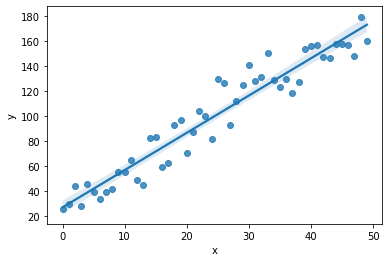

In [5]:
sns.regplot(data=df, x='x', y='y')

# Analisis con OLS sin extras

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [7]:
if agregar:
    X = df_ruidoso.drop(columns=['y'])
    y = df_ruidoso['y']
else:
    X = df.drop(columns=['y'])
    y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [8]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)

[33.80297053 -2.47193534 -2.42864166  4.25463266 -1.71466386  6.20052435
 -1.54672346  3.14750714 -2.07771318  2.1680546   1.14350909  3.72520119
  3.54788516 -7.50775626 -5.11978346 -1.65435844  2.67728586 -3.32927188
 -1.57093297 -2.73678209 -3.84160851 -1.75632921 -5.51743579  3.0538246
  1.07073842  5.83708096  7.29003341  1.63337537 -0.76495541 -2.62019291
 -0.22774938 -2.73411903 -2.59330645 -3.99749511 -3.7720072   4.04968225
  0.51932515  7.19381787  0.45866963  3.51686126 -2.44863192 -2.28773961
 -4.07279089  5.62208029  2.96585093  1.23228231]
102.64241987292971


# Ahora ridge

In [9]:
model_ridge_cv = RidgeCV(alphas= [0.001, 0.01, 0.1, 0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

0.5
[32.12000706 -1.41599809 -2.48929024  4.13885236 -2.09732249  5.60141808
 -1.60493369  2.1293045  -1.2665492   2.70354449  1.25143602  4.91836944
  2.19575692 -7.30765614 -4.96089029 -1.6618765   1.87956409 -3.28476895
 -1.06032992 -2.14868381 -4.36446633 -1.26994191 -5.38393415  3.33166145
  0.49473591  5.31057028  6.49055865  2.23014157 -1.65274959 -1.82147278
  0.27709356 -3.07101477 -2.34011159 -3.8135459  -4.04376548  3.74042098
 -0.08546567  6.83191176  0.51502646  3.45523574 -2.08811072 -2.57309651
 -4.44646315  5.30541212  2.58555502  0.71313468]
102.64241987292971


# Lasso

In [10]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 2, 3, 6, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)

3.0
[37.33561411  0.         -0.          0.         -0.          0.
 -0.          0.         -0.          0.         -0.          2.08566906
  0.         -1.85354172 -0.         -0.          0.         -0.
  0.92461639  0.         -0.         -0.         -0.          0.
  0.          0.          1.99445398 -0.         -0.          0.
 -0.          0.          0.         -0.37170152  0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.         -0.          0.         -0.        ]
102.6424198729297


In [11]:
# Comparamos metricas en train y en test

print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 1.0 y en test es 0.44163367901660255


Modelo Ridge:

Score (R^2) en train del modelo es 0.999491332166312 y en test es 0.478646143740747


Modelo Lasso:

Score (R^2) en train del modelo es 0.9310791747406006 y en test es 0.9129746045429216




In [12]:
from sklearn.metrics import mean_squared_error

metrica = mean_squared_error

print ('Modelo OLS:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_OLS.predict(X_train_std))} y en test es {metrica(y_test, model_OLS.predict(X_test_std))}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_ridge_cv.predict(X_train_std))} y en test es {metrica(y_test, model_ridge_cv.predict(X_test_std))}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (MSE) en train del modelo es {metrica(y_train, model_lasso_cv.predict(X_train_std))} y en test es {metrica(y_test, model_lasso_cv.predict(X_test_std))}')
print ('\n')

Modelo OLS:

Score (MSE) en train del modelo es 4.550661394874939e-27 y en test es 1228.890612419191


Modelo Ridge:

Score (MSE) en train del modelo es 0.9725685862519213 y en test es 1147.431060270898


Modelo Lasso:

Score (MSE) en train del modelo es 131.77603368363017 y en test es 191.53141495160355


